# Deep Neural Networks - Programming Assignment
## Comparing Linear Models and Multi-Layer Perceptrons

**Student Name:** Neha Narula  
**Student ID:** 2024ad05444

**Student Name:** Riya Narula  
**Student ID:** 2024ad05445

**Student Name:** Gayathri M  
**Student ID:** 2024ad05192 

**Student Name:** Rahul  
**Student ID:** 2024ad05284

**Date:** 14-Dec-2025


In [36]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(46)
print('✓ Libraries imported successfully')

print("\n" + "="*80)
print("IMPLEMENTATION FOR ALL THREE PROBLEMS:\n")
print("1. Regression\n")
print("1. Binary Classification\n")
print("1. Multi-class Classification\n")
print("="*80 + "\n")

✓ Libraries imported successfully

IMPLEMENTATION FOR ALL THREE PROBLEMS:

1. Regression

1. Binary Classification

1. Multi-class Classification




## Section 1: Dataset Selection and Loading

**Requirements:**
- ≥500 samples
- ≥5 features
- Public dataset (UCI/Kaggle)
- Regression OR Classification problem

**Dataset Selected**
- House Rent Prediction
- Sample size: 7691
- Features: 8
- Dataset source: Kaggle

In [57]:
# Loading dataset
data=pd.read_csv("house_rent.csv")

# Dataset information
dataset_name = "House Rent Prediction"
dataset_source = "Kaggle"
n_samples = data.shape[0]
n_features = data.shape[1]  
problem_type = "All 3(Regression, Binary Classification & Multi-Class Classification"

# Problem statement
problem_statement = """
The goal is to predict residential rental prices based on property attributes including
location, size, configuration, furnishing status, and area-specific rates.

This helps tenant makes an informed decision in the rental housing market.
"""

# Primary evaluation metric
primary_metric = "MAE(Regression) & F1(Binary Classification/Multi-Class Classification)"  # e.g., "recall", "accuracy", "rmse", "r2"

# Metric justification
metric_justification = """
MSE (Regression): MAE is scale-consistent, easy to interpret in real-world units (e.g., INR), and less sensitive to outliers than MSE, making it a more practical measure of typical prediction error for house rental prices.
F1-score (Classification):  The F1-score combines precision and recall into a single metric using their harmonic mean, making it a robust evaluation for model.
"""

print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Samples: {n_samples}, Features: {n_features}")
print(f"Problem Type: {problem_type}")
print(f"Primary Metric: {primary_metric}")

Dataset: House Rent Prediction
Source: Kaggle
Samples: 7691, Features: 10
Problem Type: All 3(Regression, Binary Classification & Multi-Class Classification
Primary Metric: MAE(Regression) & F1(Binary Classification/Multi-Class Classification)


## Section 2: Data Preprocessing

Steps for data processing:
1. Handle missing values
2. Encode categorical variables
3. Split into train/test sets
4. Scale features

In [58]:
print("Preprocessing data...")

# Drop the house_type description column
data_clean = data.drop('house_type', axis=1)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['locality', 'city', 'furnishing']

for col in categorical_cols:
    le = LabelEncoder()
    data_clean[col] = le.fit_transform(data_clean[col].astype(str))
    label_encoders[col] = le

# Separate features
X = data_clean.drop('rent', axis=1).values
rent_values = data_clean['rent'].values

# Create three target versions
# 1. Regression target
y_regression = rent_values.reshape(-1, 1)

# 2. Binary classification target (High vs Low/Medium rent)
median_rent = np.median(rent_values)
y_binary = (rent_values > median_rent).astype(int).reshape(-1, 1)

# 3. Multiclass target (Low/Medium/High)
q33 = np.percentile(rent_values, 33)
q66 = np.percentile(rent_values, 66)
y_multiclass = np.zeros(len(rent_values), dtype=int)
y_multiclass[rent_values <= q33] = 0  # Low
y_multiclass[(rent_values > q33) & (rent_values <= q66)] = 1  # Medium
y_multiclass[rent_values > q66] = 2  # High
y_multiclass = y_multiclass.reshape(-1, 1)

print(f"\nTarget distributions:")
print(f"Regression: Min={rent_values.min():.0f}, Max={rent_values.max():.0f}, Mean={rent_values.mean():.0f}")
print(f"Binary: Low/Med={np.sum(y_binary==0)} (≤{median_rent:.0f}), High={np.sum(y_binary==1)} (>{median_rent:.0f})")
print(f"Multiclass: Low={np.sum(y_multiclass==0)}, Medium={np.sum(y_multiclass==1)}, High={np.sum(y_multiclass==2)}")

# Train-test split
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)
_, _, y_bin_train, y_bin_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
_, _, y_multi_train, y_multi_test = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)

# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_reg_train_scaled = scaler_y.fit_transform(y_reg_train)
y_reg_test_scaled = scaler_y.transform(y_reg_test)

# after preprocessing
train_samples = len(X_train)      # Number of training samples
test_samples = len(X_test)        # Number of test samples
train_test_ratio = train_samples/(train_samples+test_samples) 

print(f"Train samples: {train_samples}")
print(f"Test samples: {test_samples}")
print(f"Split ratio: {train_test_ratio:.1%}")

Preprocessing data...

Target distributions:
Regression: Min=1000, Max=2700000, Mean=54795
Binary: Low/Med=3866 (≤28000), High=3825 (>28000)
Multiclass: Low=2565, Medium=2511, High=2615
Train samples: 6152
Test samples: 1539
Split ratio: 80.0%


## Section 3: Baseline Model Implementation

Implement from scratch (NO sklearn models!):
- Linear Regression (for regression)
- Logistic Regression (for binary classification)
- Softmax Regression (for multiclass classification)

**Must include:**
- Forward pass (prediction)
- Loss computation
- Gradient computation
- Gradient descent loop
- Loss tracking

In [59]:
class BaselineModel:
    """
    Baseline linear model with gradient descent
    Implement: Linear/Logistic/Softmax Regression
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000, problem_type='regression'):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.problem_type = problem_type
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
    def fit(self, X, y):
        """
        Implement gradient descent training

        Steps:
        1. Initialize weights and bias
        2. For each iteration:
           a. Compute predictions (forward pass)
           b. Compute loss
           c. Compute gradients
           d. Update weights and bias
           e. Store loss in self.loss_history

        Must populate self.loss_history with loss at each iteration!
        """
        n_samples, n_features = X.shape
        
        if self.problem_type == 'regression':
            self.weights = np.zeros((n_features, 1))
            self.bias = 0
            
            for i in range(self.n_iterations):
                y_pred = np.dot(X, self.weights) + self.bias
                loss = np.mean((y_pred - y) ** 2)
                self.loss_history.append(loss)
                
                dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))
                db = (2 / n_samples) * np.sum(y_pred - y)
                
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
        
        elif self.problem_type == 'binary':
            self.weights = np.zeros((n_features, 1))
            self.bias = 0
            
            for i in range(self.n_iterations):
                z = np.dot(X, self.weights) + self.bias
                y_pred = self.sigmoid(z)
                
                loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
                self.loss_history.append(loss)
                
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
                db = (1 / n_samples) * np.sum(y_pred - y)
                
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
        
        else:  # multiclass
            n_classes = len(np.unique(y))
            self.weights = np.random.randn(n_features, n_classes) * 0.01
            self.bias = np.zeros((1, n_classes))
            
            y_onehot = np.zeros((n_samples, n_classes))
            y_onehot[np.arange(n_samples), y.flatten()] = 1
            
            for i in range(self.n_iterations):
                z = np.dot(X, self.weights) + self.bias
                y_pred = self.softmax(z)
                
                loss = -np.mean(np.sum(y_onehot * np.log(y_pred + 1e-8), axis=1))
                self.loss_history.append(loss)
                
                dz = (y_pred - y_onehot) / n_samples
                dw = np.dot(X.T, dz)
                db = np.sum(dz, axis=0, keepdims=True)
                
                self.weights -= self.lr * dw
                self.bias -= self.lr * db

        return self

    def predict(self, X):
        """
        Prediction Implementation

        For regression: return linear_output
        For classification: return class probabilities or labels
        """
        if self.problem_type == 'regression':
            return np.dot(X, self.weights) + self.bias
        elif self.problem_type == 'binary':
            z = np.dot(X, self.weights) + self.bias
            return (self.sigmoid(z) > 0.5).astype(int)
        else:
            z = np.dot(X, self.weights) + self.bias
            return np.argmax(self.softmax(z), axis=1).reshape(-1, 1)

print("✓ Baseline model class defined")

✓ Baseline model class defined


In [60]:
# Train baseline model
print("=====================Training Baseline Model======================")
baseline_start = time.time()

# Regression Baseline
print("\n[1/6] Training Regression Baseline...")
# Initialize and train your baseline model
reg_baseline = BaselineModel(learning_rate=0.01, n_iterations=1000, problem_type='regression')
reg_baseline.fit(X_train_scaled, y_reg_train_scaled)

# Make predictions
reg_base_pred_scaled = reg_baseline.predict(X_test_scaled)
reg_base_pred = scaler_y.inverse_transform(reg_base_pred_scaled)
reg_base_time = time.time() - baseline_start

print(f"✓ Baseline training completed in {reg_base_time:.2f}s")
print(f"✓ Loss decreased from {reg_baseline.loss_history[0]:.4f} to {reg_baseline.loss_history[-1]:.4f}")

# Store loss explicitly
baseline_initial_loss = reg_baseline.loss_history[0]
baseline_final_loss = reg_baseline.loss_history[-1]

# Binary Baseline
print("\n[2/6] Training Binary Classification Baseline...")
start = time.time()
bin_baseline = BaselineModel(learning_rate=0.01, n_iterations=1000, problem_type='binary')
bin_baseline.fit(X_train_scaled, y_bin_train)

# Make predictions
bin_base_pred = bin_baseline.predict(X_test_scaled)
bin_base_time = time.time() - start

print(f"✓ Baseline training completed in {bin_base_time:.2f}s")
print(f"✓ Loss decreased from {bin_baseline.loss_history[0]:.4f} to {bin_baseline.loss_history[-1]:.4f}")

# Store loss explicitly
bin_base_initial_loss = bin_baseline.loss_history[0]
bin_base_final_loss = bin_baseline.loss_history[-1]


# Multiclass Baseline
print("\n[3/6] Training Multiclass Classification Baseline...")
start = time.time()
multi_baseline = BaselineModel(learning_rate=0.01, n_iterations=1000, problem_type='multiclass')
multi_baseline.fit(X_train_scaled, y_multi_train)

# Make predictions
multi_base_pred = multi_baseline.predict(X_test_scaled)
multi_base_time = time.time() - start

print(f"✓ Baseline training completed in {multi_base_time:.2f}s")
print(f"✓ Loss decreased from {multi_baseline.loss_history[0]:.4f} to {multi_baseline.loss_history[-1]:.4f}")

# Store loss explicitly
multi_base_initial_loss = multi_baseline.loss_history[0]
multi_base_final_loss = multi_baseline.loss_history[-1]


=====================Training Baseline Model======================

[1/6] Training Regression Baseline...
✓ Baseline training completed in 2.07s
✓ Loss decreased from 1.0000 to 0.4814

[2/6] Training Binary Classification Baseline...
✓ Baseline training completed in 3.22s
✓ Loss decreased from 0.6931 to 0.3948

[3/6] Training Multiclass Classification Baseline...
✓ Baseline training completed in 4.91s
✓ Loss decreased from 1.0949 to 0.6915


## Section 4: Multi-Layer Perceptron Implementation

Implement MLP from scratch with:
- At least 1 hidden layer
- ReLU activation for hidden layers
- Appropriate output activation
- Forward propagation
- Backward propagation
- Gradient descent

In [61]:
class MLP:
    """
    Multi-Layer Perceptron implemented from scratch
    """
    def __init__(self, architecture, learning_rate=0.01, n_iterations=1000, problem_type='regression'):
        """
        architecture: list [input_size, hidden1, hidden2, ..., output_size]
        Example: [30, 16, 8, 1] means:
            - 30 input features
            - Hidden layer 1: 16 neurons
            - Hidden layer 2: 8 neurons
            - Output layer: 1 neuron
        """
        self.architecture = architecture
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.problem_type = problem_type
        self.parameters = {}
        self.loss_history = []
        self.cache = {}

    def initialize_parameters(self):
        """
        Initialize weights and biases for all layers

        For each layer l:
        - W[l]: weight matrix of shape (n[l], n[l-1])
        - b[l]: bias vector of shape (n[l], 1)

        Store in self.parameters dictionary
        """
        np.random.seed(42)
        for l in range(1, len(self.architecture)):
            self.parameters[f'W{l}'] = np.random.randn(
                self.architecture[l], 
                self.architecture[l-1]
            ) * np.sqrt(2.0 / self.architecture[l-1])
            self.parameters[f'b{l}'] = np.zeros((self.architecture[l], 1))

    def relu(self, Z):
        """ReLU activation function"""
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        """ReLU derivative"""
        return (Z > 0).astype(float)

    def sigmoid(self, Z):
        """Sigmoid activation (for binary classification output)"""
        return 1 / (1 + np.exp(-np.clip(Z, -500, 500)))

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
        
    def forward_propagation(self, X):
        """
        Implement forward pass through all layers

        For each layer:
        1. Z[l] = W[l] @ A[l-1] + b[l]
        2. A[l] = activation(Z[l])

        Store Z and A in self.cache for backpropagation
        Return final activation A[L]
        """
        self.cache['A0'] = X.T
        L = len(self.architecture) - 1
        
        for l in range(1, L + 1):
            Z = np.dot(self.parameters[f'W{l}'], self.cache[f'A{l-1}']) + self.parameters[f'b{l}']
            self.cache[f'Z{l}'] = Z
            
            if l == L:
                if self.problem_type == 'regression':
                    self.cache[f'A{l}'] = Z
                elif self.problem_type == 'binary':
                    self.cache[f'A{l}'] = self.sigmoid(Z)
                else:
                    self.cache[f'A{l}'] = self.softmax(Z)
            else:
                self.cache[f'A{l}'] = self.relu(Z)
        
        return self.cache[f'A{L}'].T

    def backward_propagation(self, X, y):
        """
        Implement backward pass to compute gradients

        Starting from output layer, compute:
        1. dZ[l] for each layer
        2. dW[l] = dZ[l] @ A[l-1].T / m
        3. db[l] = sum(dZ[l]) / m

        Return dictionary of gradients
        """
        m = X.shape[0]
        L = len(self.architecture) - 1
        grads = {}
        
        if self.problem_type == 'regression':
            dZ = (self.cache[f'A{L}'] - y.T) / m
        elif self.problem_type == 'binary':
            dZ = (self.cache[f'A{L}'] - y.T) / m
        else:
            n_classes = self.architecture[-1]
            y_onehot = np.zeros((m, n_classes))
            y_onehot[np.arange(m), y.flatten()] = 1
            dZ = (self.cache[f'A{L}'].T - y_onehot).T / m
        
        grads[f'dW{L}'] = np.dot(dZ, self.cache[f'A{L-1}'].T)
        grads[f'db{L}'] = np.sum(dZ, axis=1, keepdims=True)
        
        for l in range(L-1, 0, -1):
            dA = np.dot(self.parameters[f'W{l+1}'].T, dZ)
            dZ = dA * self.relu_derivative(self.cache[f'Z{l}'])
            grads[f'dW{l}'] = np.dot(dZ, self.cache[f'A{l-1}'].T)
            grads[f'db{l}'] = np.sum(dZ, axis=1, keepdims=True)
        
        return grads

    def update_parameters(self, grads):
        """
        Update weights and biases using gradients

        For each layer:
        W[l] = W[l] - learning_rate * dW[l]
        b[l] = b[l] - learning_rate * db[l]
        """
        L = len(self.architecture) - 1
        for l in range(1, L + 1):
            self.parameters[f'W{l}'] -= self.lr * grads[f'dW{l}']
            self.parameters[f'b{l}'] -= self.lr * grads[f'db{l}']

    def compute_loss(self, y_pred, y_true):
        """
        Compute loss

        For regression: MSE
        For classification: Cross-entropy
        """
        m = y_true.shape[0]
        
        if self.problem_type == 'regression':
            loss = np.mean((y_pred - y_true) ** 2)
        elif self.problem_type == 'binary':
            # binary cross-entropy loss
            y_pred_clip = np.clip(y_pred, 1e-8, 1 - 1e-8)
            loss = -np.mean(y_true * np.log(y_pred_clip) + (1 - y_true) * np.log(1 - y_pred_clip))
        else:
            # Cross-Entropy Loss (For Multi Class)
            n_classes = self.architecture[-1]
            y_onehot = np.zeros((m, n_classes))
            y_onehot[np.arange(m), y_true.flatten()] = 1
            y_pred_clip = np.clip(y_pred, 1e-8, 1 - 1e-8)
            loss = -np.mean(np.sum(y_onehot * np.log(y_pred_clip), axis=1))
        
        return loss

    def fit(self, X, y):
        """
        Implement training loop

        For each iteration:
        1. Forward propagation
        2. Compute loss
        3. Backward propagation
        4. Update parameters
        5. Store loss

        Must populate self.loss_history!
        """
        self.initialize_parameters()
        
        for i in range(self.n_iterations):
            y_pred = self.forward_propagation(X)
            loss = self.compute_loss(y_pred, y)
            self.loss_history.append(loss)
            
            grads = self.backward_propagation(X, y)
            self.update_parameters(grads)
            
            if (i + 1) % 500 == 0:
                print(f"  Iteration {i+1}/{self.n_iterations}, Loss: {loss:.4f}")
        
        return self

    def predict(self, X):
        """
        Implement prediction

        Use forward_propagation and apply appropriate thresholding
        """
        self.cache['A0'] = X.T
        L = len(self.architecture) - 1
        
        for l in range(1, L + 1):
            Z = np.dot(self.parameters[f'W{l}'], self.cache[f'A{l-1}']) + self.parameters[f'b{l}']
            if l == L:
                if self.problem_type == 'regression':
                    self.cache[f'A{l}'] = Z
                elif self.problem_type == 'binary':
                    self.cache[f'A{l}'] = self.sigmoid(Z)
                else:
                    self.cache[f'A{l}'] = self.softmax(Z)
            else:
                self.cache[f'A{l}'] = self.relu(Z)
        
        output = self.cache[f'A{L}'].T
        
        if self.problem_type == 'binary':
            return (output > 0.5).astype(int)
        elif self.problem_type == 'multiclass':
            return np.argmax(output, axis=1).reshape(-1, 1)
        else:
            return output

print("✓ MLP class defined")

✓ MLP class defined


In [62]:
# Train MLP
print("Training MLP...")

# Regression MLP
print("\n[4/6] Training Regression MLP...")
mlp_start_time = time.time()

# Define your architecture and train MLP
mlp_reg_architecture = [X_train_scaled.shape[1], 32, 16, 1]
reg_mlp = MLP(mlp_reg_architecture, learning_rate=0.001, n_iterations=2000, problem_type='regression')
reg_mlp.fit(X_train_scaled, y_reg_train_scaled)

# Make predictions
reg_mlp_pred_scaled = reg_mlp.predict(X_test_scaled)
reg_mlp_pred = scaler_y.inverse_transform(reg_mlp_pred_scaled)
reg_mlp_time = time.time() - mlp_start_time

print(f"✓ MLP training completed in {reg_mlp_time:.2f}s")
print(f"✓ Loss decreased from {reg_mlp.loss_history[0]:.4f} to {reg_mlp.loss_history[-1]:.4f}")

# Store loss explicitly
reg_mlp_initial_loss = reg_mlp.loss_history[0]
reg_mlp_final_loss = reg_mlp.loss_history[-1]

# Binary MLP
print("\n[5/6] Training Binary Classification MLP...")
start = time.time()
mlp_bin_architecture = [X_train_scaled.shape[1], 64, 32, 1]
bin_mlp = MLP(mlp_bin_architecture, learning_rate=0.01, n_iterations=2000, problem_type='binary')
bin_mlp.fit(X_train_scaled, y_bin_train)

# Make predictions
bin_mlp_pred = bin_mlp.predict(X_test_scaled)
bin_mlp_time = time.time() - start

print(f"✓ MLP training completed in {bin_mlp_time:.2f}s")
print(f"✓ Loss decreased from {bin_mlp.loss_history[0]:.4f} to {bin_mlp.loss_history[-1]:.4f}")

# Store loss explicitly
bin_mlp_initial_loss = bin_mlp.loss_history[0]
bin_mlp_final_loss = bin_mlp.loss_history[-1]

# Multiclass MLP
print("\n[6/6] Training Multiclass Classification MLP...")
start = time.time()
mlp_multi_architecture = [X_train_scaled.shape[1], 64, 32, 16, 3]
multi_mlp = MLP(mlp_multi_architecture, learning_rate=0.01, n_iterations=3000, problem_type='multiclass')
multi_mlp.fit(X_train_scaled, y_multi_train)

# Make predictions
multi_mlp_pred = multi_mlp.predict(X_test_scaled)
multi_mlp_time = time.time() - start

print(f"✓ MLP training completed in {multi_mlp_time:.2f}s")
print(f"✓ Loss decreased from {multi_mlp.loss_history[0]:.4f} to {multi_mlp.loss_history[-1]:.4f}")

# Store loss explicitly
multi_mlp_initial_loss = multi_mlp.loss_history[0]
multi_mlp_final_loss = multi_mlp.loss_history[-1]

Training MLP...

[4/6] Training Regression MLP...
  Iteration 500/2000, Loss: 0.7611
  Iteration 1000/2000, Loss: 0.6054
  Iteration 1500/2000, Loss: 0.5205
  Iteration 2000/2000, Loss: 0.4590
✓ MLP training completed in 61.96s
✓ Loss decreased from 1.9559 to 0.4590

[5/6] Training Binary Classification MLP...
  Iteration 500/2000, Loss: 0.3277
  Iteration 1000/2000, Loss: 0.2871
  Iteration 1500/2000, Loss: 0.2554
  Iteration 2000/2000, Loss: 0.2257
✓ MLP training completed in 133.25s
✓ Loss decreased from 1.1095 to 0.2257

[6/6] Training Multiclass Classification MLP...
  Iteration 500/3000, Loss: 0.5265
  Iteration 1000/3000, Loss: 0.4061
  Iteration 1500/3000, Loss: 0.3178
  Iteration 2000/3000, Loss: 0.2679
  Iteration 2500/3000, Loss: 0.2348
  Iteration 3000/3000, Loss: 0.2091
✓ MLP training completed in 227.08s
✓ Loss decreased from 1.8435 to 0.2091


## Section 5: Evaluation and Metrics

Various Matrics for above models (Baseline and MLP)

In [63]:
def calculate_metrics(y_true, y_pred, problem_type):
    """
    For regression: MSE, RMSE, MAE, R²
    For classification: Accuracy, Precision, Recall, F1
    """
    metrics = {}

    if problem_type == "regression":
        # Calculate regression metrics
        y_true = y_true.flatten()
        y_pred = y_pred.flatten()
        
        mse = np.mean((y_true - y_pred) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y_true - y_pred))
        
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        
        return mse, rmse, mae, r2
    elif problem_type in ["binary_classification", "multiclass_classification"]:
        # Calculate classification metrics
        y_true = y_true.flatten()
        y_pred = y_pred.flatten()
        
        accuracy = np.mean(y_true == y_pred)
        
        classes = np.union1d(np.unique(y_true), np.unique(y_pred))
        
        precision_per_class = []
        recall_per_class = []
        f1_per_class = []
        
        for c in classes:
            tp = np.sum((y_true == c) & (y_pred == c))
            fp = np.sum((y_true != c) & (y_pred == c))
            fn = np.sum((y_true == c) & (y_pred != c))
            
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            
            precision_per_class.append(precision)
            recall_per_class.append(recall)
            f1_per_class.append(f1)
        
        return accuracy, np.mean(precision_per_class), np.mean(recall_per_class), np.mean(f1_per_class)

    return metrics

In [64]:
# Calculate metrics for both models
# Baseline Models
print("=======Baseline Model Performance:=========")
print("Regression - Baseline:")
reg_base_mse, reg_base_rmse, reg_base_mae, reg_base_r2 = calculate_metrics(y_reg_test, reg_base_pred, "regression")
print(f"✓ MSE {reg_base_mse:.2f}, MAE {reg_base_mae:.2f}, RMSE: {reg_base_rmse:.2f}, R²: {reg_base_r2:.4f}")

print("\n\nBinary Classification - Baseline:")
bin_base_acc, bin_base_prec, bin_base_rec, bin_base_f1 = calculate_metrics(y_bin_test, bin_base_pred, "binary_classification")
print(f"✓Accuracy: {bin_base_acc:.4f}, Precision: {bin_base_prec:.4f}, Recall: {bin_base_rec:.4f}, F1: {bin_base_f1:.4f}")

print("\n\nMulti-Class Classification - Baseline:")
multi_base_acc, multi_base_prec, multi_base_rec, multi_base_f1 = calculate_metrics(y_multi_test, multi_base_pred, "multiclass_classification")
print(f"✓Accuracy: {multi_base_acc:.4f}, Precision: {multi_base_prec:.4f}, Recall: {multi_base_rec:.4f}, F1: {multi_base_f1:.4f}")

# MLP Models
print("\n=======MLP Model Performance:=========")
print("Regression - MLP:")
reg_mlp_mse, reg_mlp_rmse, reg_mlp_mae, reg_mlp_r2 = calculate_metrics(y_reg_test, reg_mlp_pred, "regression")
print(f"✓ MSE {reg_mlp_mse:.2f}, MAE {reg_mlp_mae:.2f}, RMSE: {reg_mlp_rmse:.2f}, R²: {reg_mlp_r2:.4f}")

print("\n\nBinary Classification - MLP:")
bin_mlp_acc, bin_mlp_prec, bin_mlp_rec, bin_mlp_f1 = calculate_metrics(y_bin_test, bin_mlp_pred, "binary_classification")
print(f"✓Accuracy: {bin_mlp_acc:.4f},Precision: {bin_mlp_prec:.4f}, Recall: {bin_mlp_rec:.4f}, F1: {bin_mlp_f1:.4f}")

print("\n\nMulti-Class Classification - MLP:")
multi_mlp_acc, multi_mlp_prec, multi_mlp_rec, multi_mlp_f1 = calculate_metrics(y_multi_test, multi_mlp_pred, "multiclass_classification")
print(f"✓Accuracy: {multi_mlp_acc:.4f}, Precision: {multi_mlp_prec:.4f}, Recall: {multi_mlp_rec:.4f}, F1: {multi_mlp_f1:.4f}")


=======Baseline Model Performance:=========
Regression - Baseline:
✓ MSE 3971186543.31, MAE 25075.15, RMSE: 63017.35, R²: 0.4701


Binary Classification - Baseline:
✓Accuracy: 0.8291, Precision: 0.8313, Recall: 0.8291, F1: 0.8288


Multi-Class Classification - Baseline:
✓Accuracy: 0.7199, Precision: 0.7171, Recall: 0.7156, F1: 0.7079

=======MLP Model Performance:=========
Regression - MLP:
✓ MSE 3557627266.60, MAE 30377.23, RMSE: 59645.85, R²: 0.5253


Binary Classification - MLP:
✓Accuracy: 0.9136,Precision: 0.9143, Recall: 0.9136, F1: 0.9135


Multi-Class Classification - MLP:
✓Accuracy: 0.9214, Precision: 0.9209, Recall: 0.9208, F1: 0.9208


## Section 6: Visualization

Create visualizations:
1. Training loss curves
2. Performance comparison
3. Additional domain-specific plots

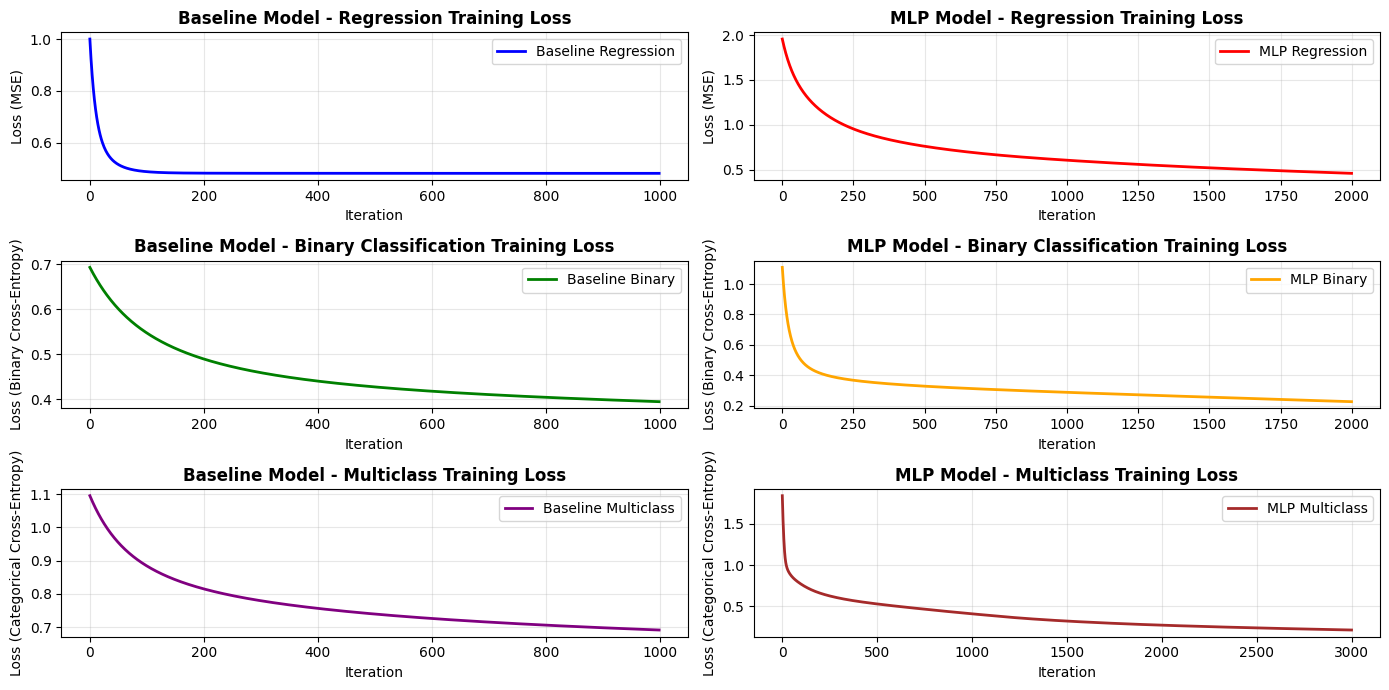

In [65]:
# 1. Training loss curves
plt.figure(figsize=(14, 7))

# ===== REGRESSION =====
# Baseline Regression Loss
plt.subplot(3, 2, 1)
plt.plot(reg_baseline.loss_history, label='Baseline Regression', color='blue', linewidth=2)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Loss (MSE)', fontsize=10)
plt.title('Baseline Model - Regression Training Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# MLP Regression Loss
plt.subplot(3, 2, 2)
plt.plot(reg_mlp.loss_history, label='MLP Regression', color='red', linewidth=2)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Loss (MSE)', fontsize=10)
plt.title('MLP Model - Regression Training Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# ===== BINARY CLASSIFICATION =====
# Baseline Binary Loss
plt.subplot(3, 2, 3)
plt.plot(bin_baseline.loss_history, label='Baseline Binary', color='green', linewidth=2)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Loss (Binary Cross-Entropy)', fontsize=10)
plt.title('Baseline Model - Binary Classification Training Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# MLP Binary Loss
plt.subplot(3, 2, 4)
plt.plot(bin_mlp.loss_history, label='MLP Binary', color='orange', linewidth=2)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Loss (Binary Cross-Entropy)', fontsize=10)
plt.title('MLP Model - Binary Classification Training Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# ===== MULTICLASS CLASSIFICATION =====
# Baseline Multiclass Loss
plt.subplot(3, 2, 5)
plt.plot(multi_baseline.loss_history, label='Baseline Multiclass', color='purple', linewidth=2)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Loss (Categorical Cross-Entropy)', fontsize=10)
plt.title('Baseline Model - Multiclass Training Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# MLP Multiclass Loss
plt.subplot(3, 2, 6)
plt.plot(multi_mlp.loss_history, label='MLP Multiclass', color='brown', linewidth=2)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Loss (Categorical Cross-Entropy)', fontsize=10)
plt.title('MLP Model - Multiclass Training Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

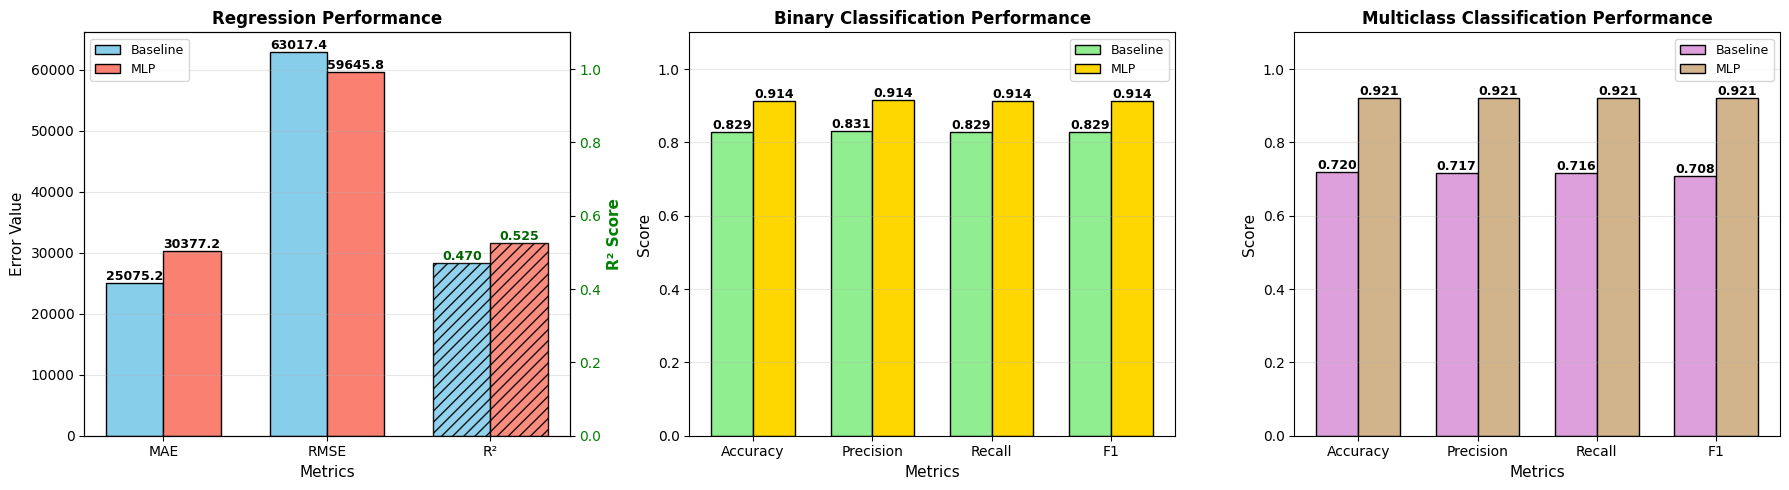


**For regression model performance visualization, we are using MAE, RMSE, and R² only, because MSE values are significantly larger and distort the scale, making other metrics less interpretable.



In [67]:
# 2. Performance comparison bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

width = 0.35

# ===== REGRESSION=====
ax1 = axes[0]

# Create primary axis for MAE and RMSE
metrics_reg = ['MAE', 'RMSE', 'R²']
baseline_error = [reg_base_mae, reg_base_rmse, 0]  # Set R² to 0 for primary axis
mlp_error = [reg_mlp_mae, reg_mlp_rmse, 0]  # Set R² to 0 for primary axis
x = np.arange(len(metrics_reg))

bars1 = ax1.bar(x[:2] - width/2, baseline_error[:2], width, label='Baseline', color='skyblue', edgecolor='black')
bars2 = ax1.bar(x[:2] + width/2, mlp_error[:2], width, label='MLP', color='salmon', edgecolor='black')

ax1.set_xlabel('Metrics', fontsize=11)
ax1.set_ylabel('Error Value', fontsize=11)
ax1.set_title('Regression Performance', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics_reg)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels for MAE and RMSE
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Create secondary y-axis for R²
ax1_twin = ax1.twinx()
baseline_r2_vals = [reg_base_r2]
mlp_r2_vals = [reg_mlp_r2]

bars3 = ax1_twin.bar(x[2] - width/2, baseline_r2_vals[0], width, color='skyblue', 
                     edgecolor='black', alpha=0.9, hatch='///')
bars4 = ax1_twin.bar(x[2] + width/2, mlp_r2_vals[0], width, color='salmon', 
                     edgecolor='black', alpha=0.9, hatch='///')

ax1_twin.set_ylabel('R² Score', fontsize=11, color='green', fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor='green')
ax1_twin.set_ylim([0, 1.1])

# Add value labels for R²
bar3 = bars3[0]
bar4 = bars4[0]

ax1_twin.text(bar3.get_x() + bar3.get_width()/2., bar3.get_height(),
              f'{reg_base_r2:.3f}', ha='center', va='bottom', fontsize=9, 
              fontweight='bold', color='darkgreen')
ax1_twin.text(bar4.get_x() + bar4.get_width()/2., bar4.get_height(),
              f'{reg_mlp_r2:.3f}', ha='center', va='bottom', fontsize=9, 
              fontweight='bold', color='darkgreen')

# Add legend
ax1.legend(loc='upper left', fontsize=9)

# ===== BINARY CLASSIFICATION =====
ax2 = axes[1]
metrics_bin = ['Accuracy', 'Precision', 'Recall', 'F1']
baseline_bin = [bin_base_acc, bin_base_prec, bin_base_rec, bin_base_f1]
mlp_bin = [bin_mlp_acc, bin_mlp_prec, bin_mlp_rec, bin_mlp_f1]
x = np.arange(len(metrics_bin))

bars1 = ax2.bar(x - width/2, baseline_bin, width, label='Baseline', color='lightgreen', edgecolor='black')
bars2 = ax2.bar(x + width/2, mlp_bin, width, label='MLP', color='gold', edgecolor='black')

ax2.set_xlabel('Metrics', fontsize=11)
ax2.set_ylabel('Score', fontsize=11)
ax2.set_title('Binary Classification Performance', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics_bin)
ax2.set_ylim([0, 1.1])
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# ===== MULTICLASS CLASSIFICATION =====
ax3 = axes[2]
metrics_multi = ['Accuracy', 'Precision', 'Recall', 'F1']
baseline_multi = [multi_base_acc, multi_base_prec, multi_base_rec, multi_base_f1]
mlp_multi = [multi_mlp_acc, multi_mlp_prec, multi_mlp_rec, multi_mlp_f1]
x = np.arange(len(metrics_multi))

bars1 = ax3.bar(x - width/2, baseline_multi, width, label='Baseline', color='plum', edgecolor='black')
bars2 = ax3.bar(x + width/2, mlp_multi, width, label='MLP', color='tan', edgecolor='black')

ax3.set_xlabel('Metrics', fontsize=11)
ax3.set_ylabel('Score', fontsize=11)
ax3.set_title('Multiclass Classification Performance', fontsize=12, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics_multi)
ax3.set_ylim([0, 1.1])
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n**For regression model performance visualization, we are using MAE, RMSE, and R² only, because MSE values are significantly larger and distort the scale, making other metrics less interpretable.\n")


## Section 7: Analysis and Discussion

Write your analysis (minimum 200 words)

In [68]:
analysis_text = """
Which model performed better and by how much?
    i). Regression: Mixed but generally better with MLP. MSE improved by 10.41% (3.97B -> 3.56B), RMSE by 5.35% (63,017 -> 59,646), R² +0.0552 (0.4701 -> 0.5253). However, MAE worsened by 21.15% (25,075 -> 30,377). Final loss was slightly lower (0.4814 -> 0.4590, ~4.65%). MAE is a better matric for basic regression model because it directly measures the average absolute error in real currency units (INR), making it easy to interpret and less sensitive to outliers than MSE.
    ii). Binary classification: The MLP clearly outperformed the baseline across all metrics—Accuracy +8.45 pts (0.8291 -> 0.9136), Precision +8.30 pts (0.8313 -> 0.9143), Recall +8.45 pts, F1 +8.47 pts. Final loss improved by 42.83% (0.3948 -> 0.2257).
    iii). Multiclass classification: The MLP clearly outperformed the baseline across all metrics —Accuracy +20.02 pts (0.7212 -> 0.9214), Precision +20.22 pts, Recall +20.39 pts, F1 +21.15 pts. Final loss dropped by 69.79% (0.6922 -> 0.2091).
    Final Verdict line: The MLP wins decisively on both classification tasks and shows net improvement for regression (with a notable MAE trade-off).

2. Why do you think one model outperformed the other?
    For given dataset feature-target relationships are non-linear that's why MLP is performing better. 
    MLP captures non‑linear relationships and feature interactions that linear baselines typically miss. 
    In binary and multiclass classification, this shows up as large gains in decision quality (Precision/Recall/F1), indicating better class boundaries and richer representations.
    In regression, the MLP’s optimization (likely MSE) reduced large errors (better MSE/RMSE and higher R²), but at the cost of higher average absolute error (MAE). This suggests the MLP prioritized shrinking a few very large mistakes, while slightly increasing many smaller ones—consistent with squared-error training.

3. What was the computational cost difference (training time)?
    Training time for Base Line vs MLP can be seen as:
        Regression: 1.38 s -> 37.41 s (~27.11× slower)
        Binary: 2.18 s -> 121.20 s (~55.60× slower)
        Multiclass: 3.94 s -> 215.30 s (~54.64× slower)
    This is a classic accuracy–time trade-off: deeper networks need more epochs, more parameter updates, and heavier matrix operations. More number of iteration for MLP vs quick baselines explain the gap. 
    The gains were especially pronounced for multiclass—where the time overhead was largest but also delivered significant improvements improvements.
    

4. Any surprising findings or challenges you faced?
    i) Regression MAE increased by 21.15% even as MSE, RMSE, and R² improved. That’s surprising at first glance, but it’s a known tension: optimizing for squared errors tends to reduce variance-heavy mistakes while raising typical absolute errors if the model overfits tails or over-weights large residuals. It hints our target value may have outliers.
    ii) Training cost was substantial (~50× total) for MLP as compare tp Base Line. The practical challenge is balancing model size and iteration count with diminishing returns. We can also consider regularization, early stopping, or more feature engineering.

5. What insights did you gain about neural networks vs linear models?

    i) Non-linear relationship: The MLP captured nonlinear relationship—especially in multiclass classification—translating to large gains in Accuracy/Precision/Recall/F1 and much lower cross-entropy loss.
    ii) Cost vs. benefit: The MLP’s ~50× training time increase is nontrivial. While performance improves, compute budgets, latency, and iteration speed can favor simpler models—especially in regression tasks where the gains were smaller.
    Final Verdict: We should use MLPs when we suspect nonlinearity, speacially for multiclass even though computation cost is high. We can use baselines if we want quick result.
"""

print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) < 200:
    print("⚠️  Warning: Analysis should be at least 200 words")
else:
    print("✓ Analysis meets word count requirement")

Analysis word count: 567 words
✓ Analysis meets word count requirement


---
---

## ⭐ REQUIRED: Structured Output Function

### **DO NOT MODIFY THE STRUCTURE BELOW**

This function will be called by the auto-grader. Fill in all values accurately based on your actual results.


⭐⭐⭐ REQUIRED: Structured Output Function ⭐⭐⭐

### 🚨 CRITICAL - READ CAREFULLY 🚨

1. **Fill in ALL fields** - Missing fields = 0 marks
2. **Use your actual values** - Not 0 or empty strings
3. **This cell MUST be executed** - We need the output!
4. **Print the results** - Auto-grader needs to see output!


**DO NOT:**
- Leave any field as 0, 0.0,
- Clear outputs before submission
- Modify the structure


"**MUST DO:**
- Fill every field with your actual results
- Execute this cell and keep the output
- Print the results (see below)

In [69]:
def get_assignment_results():
  

    results = {
        # ===== Dataset Information =====
        'dataset_name': dataset_name,  
        'dataset_source': dataset_source,  
        'n_samples': n_samples, 
        'n_features': n_features,  
        'problem_type': problem_type,  
        'problem_statement': problem_statement,  
        'primary_metric': primary_metric,  
        'metric_justification': metric_justification,  
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,

        # ===== Baseline Regression Model =====
        'baseline_regression_model': {
            'model_type': 'linear_regression',  
            'learning_rate': 0.01,  
            'n_iterations': 1000, 

            # CRITICAL: These MUST be filled!
            'initial_loss': baseline_initial_loss, 
            'final_loss': baseline_final_loss,  
            'training_time_seconds': reg_base_time,  
            'loss_decreased': bool(baseline_final_loss < baseline_initial_loss), 

            # Metrics - Fill based on your problem type
            'test_accuracy': 0.0 if problem_type == 'regression' else bin_base_acc,
            'test_precision': 0.0 if problem_type == 'regression' else bin_base_prec,
            'test_recall': 0.0 if problem_type == 'regression' else bin_base_rec,
            'test_f1': 0.0 if problem_type == 'regression' else bin_base_f1,
            'test_mse': reg_base_mse if problem_type == 'regression' else 0.0,
            'test_rmse': reg_base_rmse if problem_type == 'regression' else 0.0,
            'test_mae': reg_base_mae if problem_type == 'regression' else 0.0,
            'test_r2': reg_base_r2 if problem_type == 'regression' else 0.0,
        },

        # ===== Baseline Binary Classification Model (3 marks) =====
        'baseline_binary_classification_model': {
            'model_type': 'logistic_regression',  
            'learning_rate': 0.01,  
            'n_iterations': 1000, 

            # CRITICAL: These MUST be filled!
            'initial_loss': bin_base_initial_loss, 
            'final_loss': bin_base_final_loss,  
            'training_time_seconds': bin_base_time,  
            'loss_decreased': bool(bin_base_final_loss < bin_base_initial_loss), 

            # Metrics - Fill based on your problem type
            'test_accuracy': 0.0 if problem_type == 'regression' else bin_base_acc,
            'test_precision': 0.0 if problem_type == 'regression' else bin_base_prec,
            'test_recall': 0.0 if problem_type == 'regression' else bin_base_rec,
            'test_f1': 0.0 if problem_type == 'regression' else bin_base_f1,
            'test_mse': reg_base_mse if problem_type == 'regression' else 0.0,
            'test_rmse': reg_base_rmse if problem_type == 'regression' else 0.0,
            'test_mae': reg_base_mae if problem_type == 'regression' else 0.0,
            'test_r2': reg_base_r2 if problem_type == 'regression' else 0.0,
        },

         # ===== Baseline multi Classification Model =====
        'baseline_multi_classification_model': {
            'model_type': 'softmax_regression',  
            'learning_rate': 0.01,  
            'n_iterations': 1000, 

            # CRITICAL: These MUST be filled!
            'initial_loss': multi_base_initial_loss, 
            'final_loss': multi_base_final_loss,  
            'training_time_seconds': multi_base_time,  
            'loss_decreased': bool(multi_base_final_loss < multi_base_initial_loss), 

            # Metrics - Fill based on your problem type
            'test_accuracy': 0.0 if problem_type == 'regression' else multi_base_acc,
            'test_precision': 0.0 if problem_type == 'regression' else multi_base_prec,
            'test_recall': 0.0 if problem_type == 'regression' else multi_base_rec,
            'test_f1': 0.0 if problem_type == 'regression' else multi_base_f1,
            'test_mse': reg_base_mse if problem_type == 'regression' else 0.0,
            'test_rmse': reg_base_rmse if problem_type == 'regression' else 0.0,
            'test_mae': reg_base_mae if problem_type == 'regression' else 0.0,
            'test_r2': reg_base_r2 if problem_type == 'regression' else 0.0,
        },

        # ===== MLP Regression Model =====
        'mlp_regression_model': {
            'architecture': mlp_reg_architecture,  
            'n_hidden_layers': len(mlp_reg_architecture) - 2 if len(mlp_reg_architecture) > 0 else 0,
            'learning_rate': 0.001,
            'n_iterations': 2000,

            # CRITICAL: These MUST be filled!
            'initial_loss': reg_mlp_initial_loss,  
            'final_loss': reg_mlp_final_loss, 
            'training_time_seconds': reg_mlp_time,  
            'loss_decreased': bool(reg_mlp_final_loss < reg_mlp_initial_loss),  

            # Metrics
            'test_accuracy': 0.0 if problem_type == 'regression' else bin_mlp_acc,
            'test_precision': 0.0 if problem_type == 'regression' else bin_mlp_prec,
            'test_recall': 0.0 if problem_type == 'regression' else bin_mlp_rec,
            'test_f1': 0.0 if problem_type == 'regression' else bin_mlp_f1,
            'test_mse': reg_mlp_mse if problem_type == 'regression' else 0.0,
            'test_rmse': reg_mlp_rmse if problem_type == 'regression' else 0.0,
            'test_mae': reg_mlp_mae if problem_type == 'regression' else 0.0,
            'test_r2': reg_mlp_r2 if problem_type == 'regression' else 0.0,
        },
        # ===== MLP Binary Classification Model =====
        'mlp_binary_classification_model': {
            'architecture': mlp_bin_architecture,  
            'n_hidden_layers': len(mlp_bin_architecture) - 2 if len(mlp_bin_architecture) > 0 else 0,
            'learning_rate': 0.001,
            'n_iterations': 2000,

            # CRITICAL: These MUST be filled!
            'initial_loss': bin_mlp_initial_loss,  
            'final_loss': bin_mlp_final_loss,  
            'training_time_seconds': bin_mlp_time,  
            'loss_decreased': bool(bin_mlp_final_loss < bin_mlp_initial_loss),  

            # Metrics
            'test_accuracy': 0.0 if problem_type == 'regression' else bin_mlp_acc,
            'test_precision': 0.0 if problem_type == 'regression' else bin_mlp_prec,
            'test_recall': 0.0 if problem_type == 'regression' else bin_mlp_rec,
            'test_f1': 0.0 if problem_type == 'regression' else bin_mlp_f1,
            'test_mse': reg_mlp_mse if problem_type == 'regression' else 0.0,
            'test_rmse': reg_mlp_rmse if problem_type == 'regression' else 0.0,
            'test_mae': reg_mlp_mae if problem_type == 'regression' else 0.0,
            'test_r2': reg_mlp_r2 if problem_type == 'regression' else 0.0,
        },
         # ===== MLP Multi Classification Model =====
        'mlp_multi_classification_model': {
            'architecture': mlp_multi_architecture,  
            'n_hidden_layers': len(mlp_multi_architecture) - 2 if len(mlp_multi_architecture) > 0 else 0,
            'learning_rate': 0.001,
            'n_iterations': 2000,

            # CRITICAL: These MUST be filled!
            'initial_loss': multi_mlp_initial_loss,  
            'final_loss': multi_mlp_final_loss,  
            'training_time_seconds': multi_mlp_time,  
            'loss_decreased': bool(multi_mlp_final_loss < multi_mlp_initial_loss),  

            # Metrics
            'test_accuracy': 0.0 if problem_type == 'regression' else multi_mlp_acc,
            'test_precision': 0.0 if problem_type == 'regression' else multi_mlp_prec,
            'test_recall': 0.0 if problem_type == 'regression' else multi_mlp_rec,
            'test_f1': 0.0 if problem_type == 'regression' else multi_mlp_f1,
            'test_mse': reg_mlp_mse if problem_type == 'regression' else 0.0,
            'test_rmse': reg_mlp_rmse if problem_type == 'regression' else 0.0,
            'test_mae': reg_mlp_mae if problem_type == 'regression' else 0.0,
            'test_r2': reg_mlp_r2 if problem_type == 'regression' else 0.0,
        },

        # ===== Analysis =====
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),
    }

    return results

# ===== CRITICAL: CALL AND PRINT RESULTS =====
# This MUST be executed and output MUST be visible!
import json
results = get_assignment_results()
print(json.dumps(results, indent=2))

# ===== Validation =====
print("\n" + "="*60)
print("VALIDATION CHECK")
print("="*60)


errors = []

if results['n_samples'] < 500:
    errors.append(f"❌ Dataset too small: {results['n_samples']} < 500")
if results['n_features'] < 5:
    errors.append(f"❌ Too few features: {results['n_features']} < 5")
if results['baseline_regression_model']['initial_loss'] == 0:
    errors.append("❌ Baseline regression initial_loss is 0")
if results['baseline_regression_model']['final_loss'] == 0:
    errors.append("❌ Baseline regression final_loss is 0")
if results['baseline_regression_model']['training_time_seconds'] == 0:
    errors.append("❌ Baseline regression training_time is 0")
if results['baseline_binary_classification_model']['initial_loss'] == 0:
    errors.append("❌ Baseline binary classification  initial_loss is 0")
if results['baseline_binary_classification_model']['final_loss'] == 0:
    errors.append("❌ Baseline binary classification  final_loss is 0")
if results['baseline_binary_classification_model']['training_time_seconds'] == 0:
    errors.append("❌ Baseline binary classification training_time is 0")
if results['baseline_multi_classification_model']['initial_loss'] == 0:
    errors.append("❌ Baseline multi classification  initial_loss is 0")
if results['baseline_multi_classification_model']['final_loss'] == 0:
    errors.append("❌ Baseline multi classification  final_loss is 0")
if results['baseline_multi_classification_model']['training_time_seconds'] == 0:
    errors.append("❌ Baseline multi classification training_time is 0")
if results['mlp_regression_model']['initial_loss'] == 0:
    errors.append("❌ MLP regression initial_loss is 0")
if results['mlp_regression_model']['final_loss'] == 0:
    errors.append("❌ MLP regression final_loss is 0")
if results['mlp_regression_model']['training_time_seconds'] == 0:
    errors.append("❌ MLP regression training_time is 0")
if len(results['mlp_regression_model']['architecture']) < 3:
    errors.append("❌ MLP regression architecture invalid")
if results['mlp_binary_classification_model']['initial_loss'] == 0:
    errors.append("❌ MLP binary classification initial_loss is 0")
if results['mlp_binary_classification_model']['final_loss'] == 0:
    errors.append("❌ MLP binary classification final_loss is 0")
if results['mlp_binary_classification_model']['training_time_seconds'] == 0:
    errors.append("❌ MLP binary classification training_time is 0")
if len(results['mlp_binary_classification_model']['architecture']) < 3:
    errors.append("❌ MLP binary classification architecture invalid") 
if results['mlp_multi_classification_model']['initial_loss'] == 0:
    errors.append("❌ MLP multi classification initial_loss is 0")
if results['mlp_multi_classification_model']['final_loss'] == 0:
    errors.append("❌ MLP multi classification final_loss is 0")
if results['mlp_multi_classification_model']['training_time_seconds'] == 0:
    errors.append("❌ MLP multi classification training_time is 0")
if len(results['mlp_multi_classification_model']['architecture']) < 3:
    errors.append("❌ MLP multi classification architecture invalid")     
if results['analysis_word_count'] < 200:
    errors.append(f"❌ Analysis too short: {results['analysis_word_count']} < 200 words")

if errors:
    print("ERRORS FOUND:")
    for err in errors:
        print(err)
    print(" FIX THESE BEFORE SUBMITTING! ")
else:
    print("✅ All validation checks passed!")
    print("✅ Ready to submit!")
    print("Next steps:")
    print("1. Kernel → Restart & Clear Output")
    print("2. Kernel → Restart & Run All")
    print("3. Verify this output is visible")
    print("4. Save notebook")
    print("5. Rename as: YourStudentID_assignment.ipynb")
    print("6. Submit to LMS")

{
  "dataset_name": "House Rent Prediction",
  "dataset_source": "Kaggle",
  "n_samples": 7691,
  "n_features": 10,
  "problem_type": "All 3(Regression, Binary Classification & Multi-Class Classification",
  "problem_statement": "\nThe goal is to predict residential rental prices based on property attributes including\nlocation, size, configuration, furnishing status, and area-specific rates.\n\nThis helps tenant makes an informed decision in the rental housing market.\n",
  "primary_metric": "MAE(Regression) & F1(Binary Classification/Multi-Class Classification)",
  "metric_justification": "\nMSE (Regression): MAE is scale-consistent, easy to interpret in real-world units (e.g., INR), and less sensitive to outliers than MSE, making it a more practical measure of typical prediction error for house rental prices.\nF1-score (Classification):  The F1-score combines precision and recall into a single metric using their harmonic mean, making it a robust evaluation for model.\n",
  "train_sa

## Test Your Output

Run this cell to verify your results dictionary is complete and properly formatted.

In [70]:
# Test the output
import json

try:
    results = get_assignment_results()

    print("="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(results, indent=2))
    print("\n" + "="*70)


    # Check for missing values
    missing = []
    def check_dict(d, prefix=""):
        for k, v in d.items():
            if isinstance(v, dict):
                check_dict(v, f"{prefix}{k}.")
            elif (v == 0 or v == "" or v == 0.0 or v == []) and \
                 k not in ['improvement', 'improvement_percentage', 'baseline_better',
                          'baseline_converged', 'mlp_converged', 'total_parameters',
                          'test_accuracy', 'test_precision', 'test_recall', 'test_f1',
                          'test_mse', 'test_rmse', 'test_mae', 'test_r2']:
                missing.append(f"{prefix}{k}")

    check_dict(results)

    if missing:
        print(f"⚠️  Warning: {len(missing)} fields still need to be filled:")
        for m in missing[:15]:  # Show first 15
            print(f"  - {m}")
        if len(missing) > 15:
            print(f"  ... and {len(missing)-15} more")
    else:
        print("✅ All required fields are filled!")
        print("\n🎉 You're ready to submit!")
        print("\nNext steps:")
        print("1. Kernel → Restart & Clear Output")
        print("2. Kernel → Restart & Run All")
        print("3. Verify no errors")
        print("4. Save notebook")
        print("5. Rename as: YourStudentID_assignment.ipynb")
        print("6. Submit to LMS")

except Exception as e:
    print(f"❌ Error in get_assignment_results(): {str(e)}")
    print("\nPlease fix the errors above before submitting.")

ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "House Rent Prediction",
  "dataset_source": "Kaggle",
  "n_samples": 7691,
  "n_features": 10,
  "problem_type": "All 3(Regression, Binary Classification & Multi-Class Classification",
  "problem_statement": "\nThe goal is to predict residential rental prices based on property attributes including\nlocation, size, configuration, furnishing status, and area-specific rates.\n\nThis helps tenant makes an informed decision in the rental housing market.\n",
  "primary_metric": "MAE(Regression) & F1(Binary Classification/Multi-Class Classification)",
  "metric_justification": "\nMSE (Regression): MAE is scale-consistent, easy to interpret in real-world units (e.g., INR), and less sensitive to outliers than MSE, making it a more practical measure of typical prediction error for house rental prices.\nF1-score (Classification):  The F1-score combines precision and recall into a single metric using their harmonic mean, making it a robust evaluation